## ALCX Free Square Question: 3rd Party Data

Authors: dtradke

Date: April 25, 2021

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import util

In [3]:
# load 3rd party data
path = "data/cci30_OHLCV.csv"
market_avg = util.loadMarketAvg(path)

In [4]:
# load ALCX price data
url = 'https://api.flipsidecrypto.com/api/v2/queries/43f66ead-faf9-4f46-9bae-29760810d3b0/data/latest'
dataset = util.loadData(url)

In [5]:
# sort prices and trim non-24 hour day
df = pd.DataFrame(dataset)
df = df.sort_values('HOUR')
alcx_price = np.array(df["PRICE"])[:-2]

In [6]:
# calculate daily mean of ALCX and match up with 3rd party data
mean_alcx = util.meanALCX(alcx_price)
market_avg = market_avg[(-1*mean_alcx.size):]

In [7]:
# normalize the data for direct comparison
mean_alcx = (mean_alcx - np.amin(mean_alcx)) / (np.amax(mean_alcx) - np.amin(mean_alcx))
market_avg = (market_avg - np.amin(market_avg)) / (np.amax(market_avg) - np.amin(market_avg))

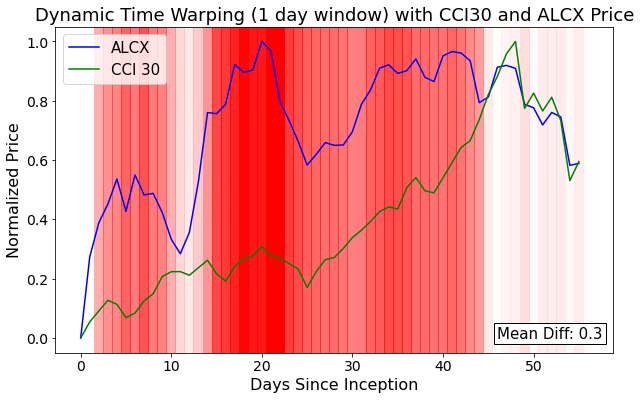

In [8]:
# Perform Dynamic Time Warping with 1-day window and plot, absolute differences
window = 1
diffs = util.doDTW(mean_alcx, market_avg, window)
util.plotCompare(mean_alcx, market_avg, diffs, window)

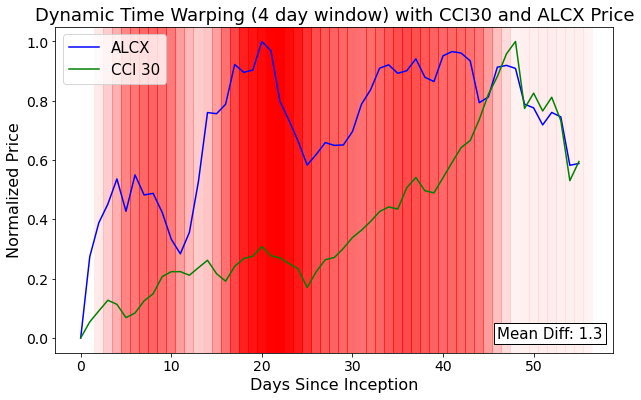

In [9]:
# Perform Dynamic Time Warping with 4-day window and plot
window = 4
diffs = util.doDTW(mean_alcx, market_avg, window)
util.plotCompare(mean_alcx, market_avg, diffs, window)

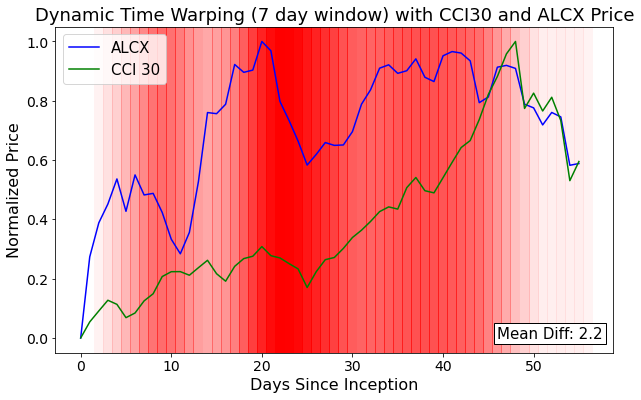

In [10]:
# Perform Dynamic Time Warping with 7-day window and plot
window = 7
diffs = util.doDTW(mean_alcx, market_avg, window)
util.plotCompare(mean_alcx, market_avg, diffs, window)

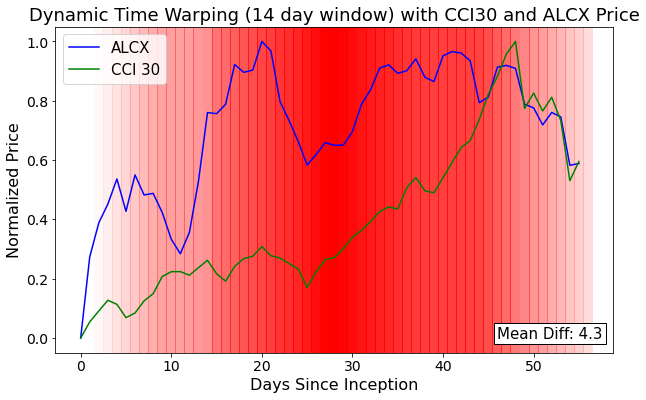

In [11]:
# Perform Dynamic Time Warping with 14-day window and plot
window = 14
diffs = util.doDTW(mean_alcx, market_avg, window)
util.plotCompare(mean_alcx, market_avg, diffs, window)

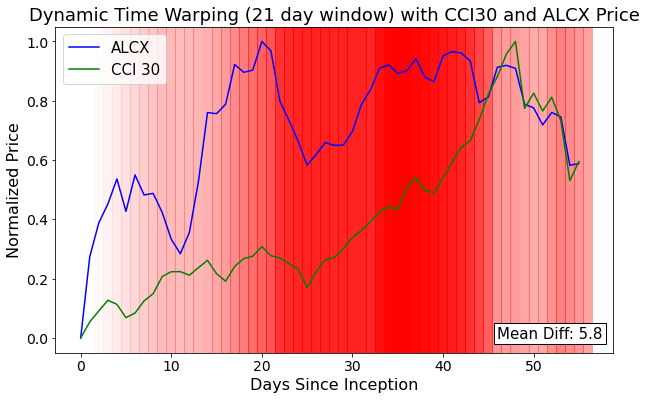

In [12]:
# Perform Dynamic Time Warping with 21-day window and plot
window = 21
diffs = util.doDTW(mean_alcx, market_avg, window)
util.plotCompare(mean_alcx, market_avg, diffs, window)